In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
len(os.listdir('D:\\college\\6TH SEM\MINOR PROJECT\\COVID-19_Radiography_Dataset\\COVID\\images'))

3616

In [3]:
img = cv2.imread('D:\\college\\6TH SEM\MINOR PROJECT\\COVID-19_Radiography_Dataset\\Normal\\images\\Normal-10005.png')

In [4]:
type(img)

numpy.ndarray

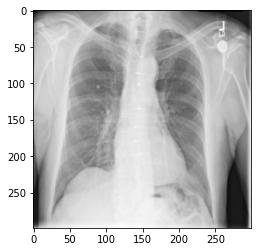

In [5]:
plt.imshow(img)

In [6]:
img.shape

(299, 299, 3)

In [7]:
df = pd.read_excel('D:\\college\\6TH SEM\\MINOR PROJECT\\COVID-19_Radiography_Dataset\\COVID.metadata.xlsx')

In [8]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [9]:
urls = os.listdir('D:\\college\\6TH SEM\\MINOR PROJECT\\COVID-19_Radiography_Dataset\\COVID\\images')

In [10]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [11]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

In [12]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img 
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [13]:
covid_path = "D:\\college\\6TH SEM\\MINOR PROJECT\\COVID-19_Radiography_Dataset\\COVID\\images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [14]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [15]:
normal_path = "D:\\college\\6TH SEM\\MINOR PROJECT\\COVID-19_Radiography_Dataset\\Normal\\images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [16]:
# covidImages = np.asarray(covidImages)
# normalImages = np.asarray(normalImages)

In [17]:
pne_path="D:\\college\\6TH SEM\\MINOR PROJECT\\COVID-19_Radiography_Dataset\\Viral_Pneumonia\\images"
pne_urls=os.listdir(pne_path)
pneImages,pneTargets=loadImages(pne_path,pne_urls,2)

In [18]:
pneImages.shape

(1345, 100, 100, 3)

In [19]:
covidImages.shape

(3616, 100, 100, 3)

In [20]:
normalImages.shape

(10192, 100, 100, 3)

In [21]:
data = np.r_[covidImages, normalImages, pneImages]

In [22]:
data.shape

(15153, 100, 100, 3)

In [23]:
targets = np.r_[covidTargets, normalTargets,pneTargets]

In [24]:
targets.shape

(15153,)

In [25]:
# data = data / 255.0

In [26]:
from sklearn.model_selection import train_test_split

C:\Users\drish\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [28]:
import tensorflow as tf

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.applications import VGG16
from keras.losses import CategoricalCrossentropy


In [77]:
#modelvgg=VGG16(weights="imagenet",include_top=False)

# VGG16




Epoch 1/5


356/356 [==============================] - 550s 2s/step - loss: -27304.4395 - accuracy: 0.7039 - val_loss: -130628.3906 - val_accuracy: 0.7205
Epoch 2/5
356/356 [==============================] - 520s 1s/step - loss: -649828.7500 - accuracy: 0.6942 - val_loss: -1409038.8750 - val_accuracy: 0.7348
Epoch 3/5
356/356 [==============================] - 594s 2s/step - loss: -3124538.7500 - accuracy: 0.6931 - val_loss: -4979808.5000 - val_accuracy: 0.7158
Epoch 4/5
356/356 [==============================] - 630s 2s/step - loss: -8587371.0000 - accuracy: 0.6843 - val_loss: -11955551.0000 - val_accuracy: 0.7160
Epoch 5/5
356/356 [==============================] - 569s 2s/step - loss: -18072070.0000 - accuracy: 0.6626 - val_loss: -22593676.0000 - val_accuracy: 0.6764


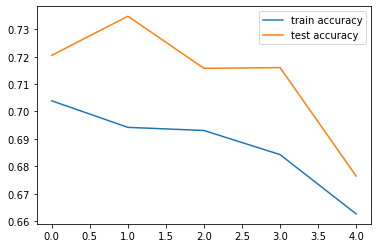

In [36]:
from keras.applications import VGG16

# Load the pre-trained VGG16 model without the top (classification) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification layers
model_vgg = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_vgg.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history_vgg.history['accuracy'], label='train accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()


# AlexNet

Epoch 1/5
356/356 [==============================] - 152s 419ms/step - loss: 1.5280 - accuracy: 0.6211 - val_loss: 0.5613 - val_accuracy: 0.6448
Epoch 2/5
356/356 [==============================] - 144s 406ms/step - loss: -1208.0847 - accuracy: 0.4739 - val_loss: 0.6931 - val_accuracy: 0.6693
Epoch 3/5
356/356 [==============================] - 147s 412ms/step - loss: 90.5745 - accuracy: 0.6692 - val_loss: 0.6847 - val_accuracy: 0.6693
Epoch 4/5
356/356 [==============================] - 142s 397ms/step - loss: 1.7378 - accuracy: 0.6694 - val_loss: 0.6814 - val_accuracy: 0.6693
Epoch 5/5
356/356 [==============================] - 144s 404ms/step - loss: 0.7567 - accuracy: 0.6733 - val_loss: 0.6802 - val_accuracy: 0.6693


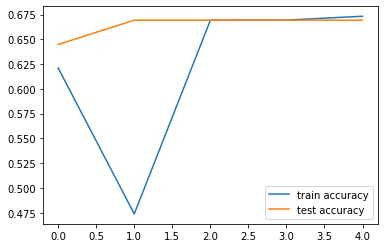

In [38]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model_alexnet = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_alexnet.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history_alexnet = model_alexnet.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history_alexnet.history['accuracy'], label='train accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()


# LeNet

Epoch 1/5
356/356 [==============================] - 18s 45ms/step - loss: -15676.7900 - accuracy: 0.6112 - val_loss: -98221.0078 - val_accuracy: 0.5439
Epoch 2/5
356/356 [==============================] - 15s 42ms/step - loss: -85691208.0000 - accuracy: 0.6043 - val_loss: -477012384.0000 - val_accuracy: 0.6580
Epoch 3/5
356/356 [==============================] - 14s 40ms/step - loss: -3656169216.0000 - accuracy: 0.6202 - val_loss: -8810205184.0000 - val_accuracy: 0.6281
Epoch 4/5
356/356 [==============================] - 14s 39ms/step - loss: -27314636800.0000 - accuracy: 0.6162 - val_loss: -49203888128.0000 - val_accuracy: 0.5922
Epoch 5/5
356/356 [==============================] - 14s 40ms/step - loss: -103470309376.0000 - accuracy: 0.6345 - val_loss: -144440213504.0000 - val_accuracy: 0.6403


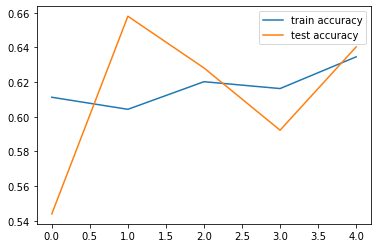

In [39]:
from keras.layers import Conv2D, AveragePooling2D, Flatten

model_lenet = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(100, 100, 3)),
    AveragePooling2D(),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lenet.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history_lenet = model_lenet.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history_lenet.history['accuracy'], label='train accuracy')
plt.plot(history_lenet.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()


Epoch 1/5
356/356 [==============================] - 335s 916ms/step - loss: -210.6929 - accuracy: 0.7191 - val_loss: -747.3474 - val_accuracy: 0.7759
Epoch 2/5
356/356 [==============================] - 308s 866ms/step - loss: -1682.0028 - accuracy: 0.7335 - val_loss: -3260.1824 - val_accuracy: 0.7279
Epoch 3/5
356/356 [==============================] - 359s 1s/step - loss: -4832.5923 - accuracy: 0.7386 - val_loss: -7537.4556 - val_accuracy: 0.7516
Epoch 4/5
356/356 [==============================] - 331s 931ms/step - loss: -9412.6816 - accuracy: 0.7293 - val_loss: -13266.1328 - val_accuracy: 0.7561
Epoch 5/5
356/356 [==============================] - 328s 923ms/step - loss: -15402.0498 - accuracy: 0.7387 - val_loss: -20363.1836 - val_accuracy: 0.7759


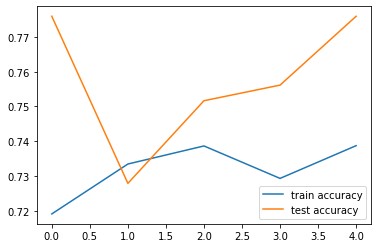

In [79]:
from keras.applications import ResNet50

# Load the pre-trained ResNet50 model without downloading weights
resnet_base = ResNet50(weights=None, include_top=False, input_shape=(100, 100, 3))

# Load the weights manually
weights_path = 'C:\\Users\\drish\\Downloads\\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet_base.load_weights(weights_path)

# Freeze the convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom classification layers
model_resnet = Sequential([
    resnet_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_resnet.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history_resnet.history['accuracy'], label='train accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

In [31]:
model5a = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [32]:
model5a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

In [40]:
from keras.losses import sparse_categorical_crossentropy

In [41]:
model5a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model5a.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5


356/356 [==============================] - 26s 67ms/step - loss: 1.3219 - accuracy: 0.7193 - val_loss: 0.4105 - val_accuracy: 0.8176
Epoch 2/5
356/356 [==============================] - 23s 64ms/step - loss: 0.4562 - accuracy: 0.8013 - val_loss: 0.3848 - val_accuracy: 0.8430
Epoch 3/5
356/356 [==============================] - 23s 64ms/step - loss: 0.3682 - accuracy: 0.8458 - val_loss: 0.2816 - val_accuracy: 0.8844
Epoch 4/5
356/356 [==============================] - 22s 62ms/step - loss: 0.3005 - accuracy: 0.8750 - val_loss: 0.2596 - val_accuracy: 0.8992
Epoch 5/5
356/356 [==============================] - 22s 63ms/step - loss: 0.2632 - accuracy: 0.8930 - val_loss: 0.2617 - val_accuracy: 0.8915


In [ ]:
plt.plot(model5a.history.history['accuracy'], label = 'train accuracy')
plt.plot(model5a.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(model5a.history.history['loss'], label = 'train loss')
plt.plot(model5a.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [43]:
model5Ea = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='elu'),
    Dropout(0.5),
    Dense(256, activation='elu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [75]:
model5Ea.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 16)       

In [45]:
model5Ea.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
model5Ea.fit(x_train, y_train,batch_size=32,epochs=3,validation_data=(x_test, y_test))

Epoch 1/3
356/356 [==============================] - 36s 101ms/step - loss: 0.1505 - accuracy: 0.9439 - val_loss: 0.2007 - val_accuracy: 0.9285
Epoch 2/3
356/356 [==============================] - 30s 83ms/step - loss: 0.1549 - accuracy: 0.9422 - val_loss: 0.2050 - val_accuracy: 0.9287
Epoch 3/3
356/356 [==============================] - 32s 89ms/step - loss: 0.1357 - accuracy: 0.9478 - val_loss: 0.2279 - val_accuracy: 0.9314


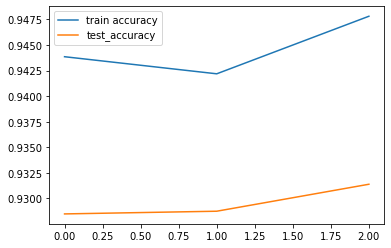

In [86]:
plt.plot(model5Ea.history.history['accuracy'], label = 'train accuracy')
plt.plot(model5Ea.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

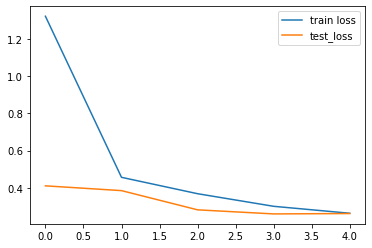

In [84]:
plt.plot(model5a.history.history['loss'], label = 'train loss')
plt.plot(model5a.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [47]:
model8a=Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(256, activation='relu'),
    Dropout(0.8),
    Dense(3, activation='softmax')
])#dropout 0.8

In [48]:
model8a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 16)       

In [49]:
model8a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model8a.fit(x_train, y_train,batch_size=32,epochs=2,validation_data=(x_test, y_test))

Epoch 1/2
356/356 [==============================] - 21s 58ms/step - loss: 0.6689 - accuracy: 0.6800 - val_loss: 0.6241 - val_accuracy: 0.6923
Epoch 2/2
356/356 [==============================] - 24s 67ms/step - loss: 0.6247 - accuracy: 0.6962 - val_loss: 0.5824 - val_accuracy: 0.7142


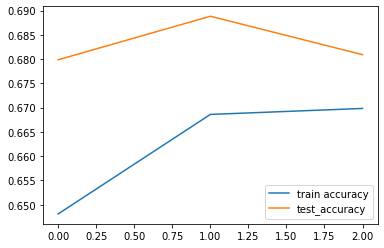

In [51]:
plt.plot(model8a.history.history['accuracy'], label = 'train accuracy')
plt.plot(model8a.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

In [53]:
model8Ea=Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='elu'),
    Dropout(0.8),
    Dense(256, activation='elu'),
    Dropout(0.8),
    Dense(3, activation='softmax')
])#dropout 0.8

In [76]:
model8Ea.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 10, 10, 16)       

In [55]:
model8Ea.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model8Ea.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
356/356 [==============================] - 29s 74ms/step - loss: 3.9813 - accuracy: 0.5327 - val_loss: 0.7278 - val_accuracy: 0.6899
Epoch 2/5
356/356 [==============================] - 25s 70ms/step - loss: 1.3893 - accuracy: 0.5926 - val_loss: 0.5878 - val_accuracy: 0.7110
Epoch 3/5
356/356 [==============================] - 23s 65ms/step - loss: 0.9637 - accuracy: 0.6433 - val_loss: 0.4621 - val_accuracy: 0.8113
Epoch 4/5
356/356 [==============================] - 24s 68ms/step - loss: 0.7063 - accuracy: 0.6996 - val_loss: 0.3969 - val_accuracy: 0.8406
Epoch 5/5
356/356 [==============================] - 23s 64ms/step - loss: 0.5744 - accuracy: 0.7422 - val_loss: 0.4234 - val_accuracy: 0.8189


In [57]:
model5s=Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])#dropout 0.5 sgd

In [58]:
model5s.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 23, 23, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 10, 10, 16)       

In [59]:
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model5s.compile(optimizer=sgd_optimizer, loss=sparse_categorical_crossentropy,metrics=['accuracy'])

In [60]:
model5s.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
356/356 [==============================] - 22s 57ms/step - loss: 36417564.0000 - accuracy: 0.6627 - val_loss: 0.8192 - val_accuracy: 0.6799
Epoch 2/5
356/356 [==============================] - 20s 55ms/step - loss: 0.8257 - accuracy: 0.6702 - val_loss: 0.8186 - val_accuracy: 0.6799
Epoch 3/5
356/356 [==============================] - 20s 55ms/step - loss: 0.8257 - accuracy: 0.6702 - val_loss: 0.8184 - val_accuracy: 0.6799
Epoch 4/5
356/356 [==============================] - 20s 56ms/step - loss: 0.8257 - accuracy: 0.6702 - val_loss: 0.8198 - val_accuracy: 0.6799
Epoch 5/5
356/356 [==============================] - 20s 55ms/step - loss: 0.8258 - accuracy: 0.6702 - val_loss: 0.8189 - val_accuracy: 0.6799


In [62]:
model5s1=Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])#dropout 0.5 sgd

In [63]:
sgd_optimizer = SGD(learning_rate=0.05, momentum=0.82)
model5s1.compile(optimizer=sgd_optimizer, loss=sparse_categorical_crossentropy,metrics=['accuracy'])

In [64]:
model5s1.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
356/356 [==============================] - 22s 57ms/step - loss: 100836829858627584.0000 - accuracy: 0.6662 - val_loss: 0.8186 - val_accuracy: 0.6799
Epoch 2/5
356/356 [==============================] - 20s 55ms/step - loss: 0.8267 - accuracy: 0.6702 - val_loss: 0.8187 - val_accuracy: 0.6799
Epoch 3/5
356/356 [==============================] - 19s 54ms/step - loss: 0.8266 - accuracy: 0.6702 - val_loss: 0.8189 - val_accuracy: 0.6799
Epoch 4/5
356/356 [==============================] - 20s 56ms/step - loss: 0.8265 - accuracy: 0.6702 - val_loss: 0.8221 - val_accuracy: 0.6799
Epoch 5/5
356/356 [==============================] - 20s 56ms/step - loss: 0.8266 - accuracy: 0.6702 - val_loss: 0.8194 - val_accuracy: 0.6799


In [65]:
model8s=Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(256, activation='relu'),
    Dropout(0.8),
    Dense(3, activation='softmax')
])#dropout 0.8 sgd

In [66]:
model8s.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 23, 23, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 10, 10, 16)       

In [67]:
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model8s.compile(optimizer=sgd_optimizer, loss=sparse_categorical_crossentropy,metrics=['accuracy'])

In [68]:
model8s.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
356/356 [==============================] - 25s 59ms/step - loss: nan - accuracy: 0.6673 - val_loss: nan - val_accuracy: 0.6799
Epoch 2/5
356/356 [==============================] - 20s 56ms/step - loss: nan - accuracy: 0.6702 - val_loss: nan - val_accuracy: 0.6799
Epoch 3/5
356/356 [==============================] - 20s 57ms/step - loss: nan - accuracy: 0.6702 - val_loss: nan - val_accuracy: 0.6799
Epoch 4/5
356/356 [==============================] - 20s 56ms/step - loss: nan - accuracy: 0.6702 - val_loss: nan - val_accuracy: 0.6799
Epoch 5/5
356/356 [==============================] - 20s 56ms/step - loss: nan - accuracy: 0.6702 - val_loss: nan - val_accuracy: 0.6799


In [69]:
model8Es=Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='elu'),
    Dropout(0.8),
    Dense(256, activation='elu'),
    Dropout(0.8),
    Dense(3, activation='softmax')
])#dropout 0.8 sgd

In [70]:
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model8Es.compile(optimizer=sgd_optimizer, loss=sparse_categorical_crossentropy,metrics=['accuracy'])

In [71]:
model8Es.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
356/356 [==============================] - 22s 60ms/step - loss: nan - accuracy: 0.6653 - val_loss: nan - val_accuracy: 0.6799
Epoch 2/5
356/356 [==============================] - 21s 60ms/step - loss: nan - accuracy: 0.6702 - val_loss: nan - val_accuracy: 0.6799
Epoch 3/5
356/356 [==============================] - 22s 61ms/step - loss: nan - accuracy: 0.6702 - val_loss: nan - val_accuracy: 0.6799
Epoch 4/5
356/356 [==============================] - 22s 61ms/step - loss: nan - accuracy: 0.6702 - val_loss: nan - val_accuracy: 0.6799
Epoch 5/5
356/356 [==============================] - 23s 63ms/step - loss: nan - accuracy: 0.6702 - val_loss: nan - val_accuracy: 0.6799


In [72]:
#plt.plot(model.history.history['accuracy'], label = 'train accuracy')
#plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
#plt.legend()
#plt.show()

In [ ]:
#plt.plot(model.history.history['loss'], label = 'train loss')
#plt.plot(model.history.history['val_loss'],label = 'test_loss')
#plt.legend()
#plt.show()

In [ ]:
#DDDDDD----------------

In [ ]:
model8D=Sequential([
    Conv2D(64, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(256, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='sigmoid')
])#dropout 0.8 sgd

In [ ]:
model8D.summary()

In [ ]:
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model8D.compile(optimizer=sgd_optimizer, loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model8D.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

In [ ]:
modelad = Sequential([
    Conv2D(64, 3, input_shape=(100,100,3), activation='elu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='elu'),
    Dense(256, activation='elu'),
    Dense(1, activation='sigmoid')
])#without dropout

In [ ]:
modelad.summary()

In [ ]:
modelad.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
modelad.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_test, y_test))

In [ ]:
#Analysis Part
#batch size
#optimezer-----> Adam,SGD,RMSProp
#Activation function-->Relu    elu,sigmoid,tanh,leakyRelu




Epoch 1/5


324/324 [==============================] - 466s 1s/step - loss: 1.4446 - accuracy: 0.8502 - val_loss: 0.1960 - val_accuracy: 0.9302
Epoch 2/5
324/324 [==============================] - 429s 1s/step - loss: 0.3053 - accuracy: 0.8949 - val_loss: 0.1636 - val_accuracy: 0.9337
Epoch 3/5
324/324 [==============================] - 377s 1s/step - loss: 0.2438 - accuracy: 0.9114 - val_loss: 0.1816 - val_accuracy: 0.9279
Epoch 4/5
324/324 [==============================] - 382s 1s/step - loss: 0.2225 - accuracy: 0.9173 - val_loss: 0.1610 - val_accuracy: 0.9395
Epoch 5/5
324/324 [==============================] - 377s 1s/step - loss: 0.2164 - accuracy: 0.9228 - val_loss: 0.1474 - val_accuracy: 0.9473


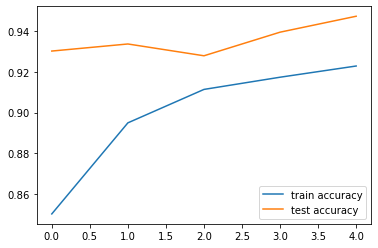

In [28]:
from keras.applications import VGG16

# Load the pre-trained VGG16 model without the top (classification) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification layers
model_vgg = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_vgg.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history_vgg.history['accuracy'], label='train accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()


Epoch 1/5
324/324 [==============================] - 21s 55ms/step - loss: 1.3879 - accuracy: 0.7739 - val_loss: 0.3558 - val_accuracy: 0.8372
Epoch 2/5
324/324 [==============================] - 12s 36ms/step - loss: 0.3076 - accuracy: 0.8633 - val_loss: 0.3193 - val_accuracy: 0.8560
Epoch 3/5
324/324 [==============================] - 11s 35ms/step - loss: 0.2625 - accuracy: 0.8853 - val_loss: 0.2654 - val_accuracy: 0.8844
Epoch 4/5
324/324 [==============================] - 13s 39ms/step - loss: 0.2002 - accuracy: 0.9101 - val_loss: 0.2501 - val_accuracy: 0.8899
Epoch 5/5
324/324 [==============================] - 12s 36ms/step - loss: 0.1618 - accuracy: 0.9329 - val_loss: 0.2561 - val_accuracy: 0.8963


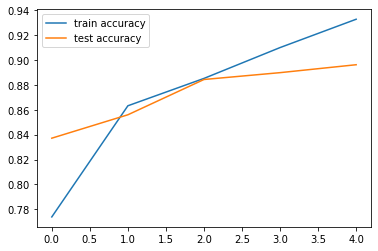

In [74]:
model_vgg.summary()

NameError: name 'model_vgg' is not defined

In [92]:
modelfinals = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='elu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='elu'),
    Dropout(0.5),
    Dense(256, activation='elu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [98]:
modelfinals.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 23, 23, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 10, 10, 16)      

In [93]:
modelfinals.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [94]:
modelfinals.fit(x_train, y_train,batch_size=32,epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
356/356 [==============================] - 37s 95ms/step - loss: 1.5636 - accuracy: 0.6792 - val_loss: 0.4118 - val_accuracy: 0.8240
Epoch 2/20
356/356 [==============================] - 30s 84ms/step - loss: 0.5486 - accuracy: 0.7801 - val_loss: 0.3121 - val_accuracy: 0.8659
Epoch 3/20
356/356 [==============================] - 29s 83ms/step - loss: 0.4295 - accuracy: 0.8317 - val_loss: 0.2847 - val_accuracy: 0.8913
Epoch 4/20
356/356 [==============================] - 29s 81ms/step - loss: 0.3527 - accuracy: 0.8625 - val_loss: 0.2937 - val_accuracy: 0.8828
Epoch 5/20
356/356 [==============================] - 33s 93ms/step - loss: 0.3072 - accuracy: 0.8812 - val_loss: 0.2237 - val_accuracy: 0.9142
Epoch 6/20
356/356 [==============================] - 30s 84ms/step - loss: 0.2650 - accuracy: 0.8961 - val_loss: 0.2135 - val_accuracy: 0.9192
Epoch 7/20
356/356 [==============================] - 28s 80ms/step - loss: 0.2406 - accuracy: 0.9073 - val_loss: 0.2011 - val_accuracy:

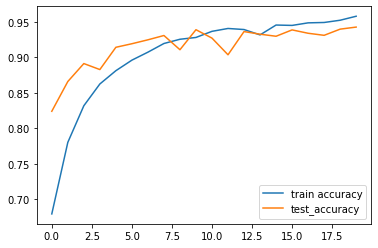

In [95]:
plt.plot(modelfinals.history.history['accuracy'], label = 'train accuracy')
plt.plot(modelfinals.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

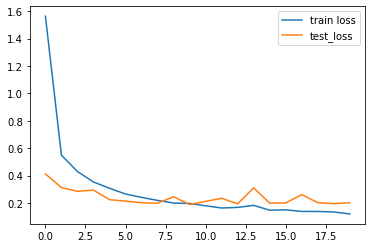

In [96]:
plt.plot(modelfinals.history.history['loss'], label = 'train loss')
plt.plot(modelfinals.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()